In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

def processDataFrame(df):
    size_map = {'jbo': 1,    'sml': 2,    'med': 3,
                'med-lge': 4,    'lge': 5,    'xlge': 6,
                'exjbo': 7}
    df = df.assign(
         size = df['Item Size'].map(size_map),
         avgPrice = (df['Low Price'] + df['High Price'])/2,
         sizeClass =(df['Item Size'].map(size_map) >= 3).astype(int)
         )
    df = df[['size','avgPrice','sizeClass']]  
    return df

In [4]:
atlanta = pd.read_csv('atlanta_9-24-2016_9-30-2017.csv')
atlanta = processDataFrame(atlanta)
baltimore = pd.read_csv('baltimore_9-24-2016_9-30-2017.csv')
baltimore = processDataFrame(baltimore)
boston = pd.read_csv('boston_9-24-2016_9-30-2017.csv')
boston = processDataFrame(boston)
chicago = pd.read_csv('chicago_9-24-2016_9-30-2017.csv')
chicago = processDataFrame(chicago)
colombia = pd.read_csv('columbia_9-24-2016_9-30-2017.csv')
colombia = processDataFrame(colombia)
dallas = pd.read_csv('dallas_9-24-2016_9-30-2017.csv')
dallas = processDataFrame(dallas)
detroit = pd.read_csv('detroit_9-24-2016_9-30-2017.csv')
detroit = processDataFrame(detroit)
losAngles = pd.read_csv('los-angeles_9-24-2016_9-30-2017.csv')
losAngles = processDataFrame(losAngles)
miami = pd.read_csv('miami_9-24-2016_9-30-2017.csv')
miami = processDataFrame(miami)
newYork = pd.read_csv('new-york_9-24-2016_9-30-2017.csv')
newYork = processDataFrame(newYork)
philD = pd.read_csv('philadelphia_9-24-2016_9-30-2017.csv')
philD = processDataFrame(philD)
sanFran = pd.read_csv('san-fransisco_9-24-2016_9-30-2017.csv')
sanFran = processDataFrame(sanFran)
stLouis = pd.read_csv('st-louis_9-24-2016_9-30-2017.csv')
stLouis = processDataFrame(stLouis)

In [23]:
sanFran.head(50)

,size,avgPrice,sizeClass
0,NaN,155.0,0
1,NaN,155.0,0
2,5.0,155.0,1
3,2.0,135.0,0
4,5.0,142.5,1
5,2.0,135.0,0
6,5.0,135.0,1
7,3.0,135.0,1
8,2.0,132.5,0
9,5.0,132.5,1


In [12]:
def trainTestSegregation(df) : 
    all_records= np.arange(df.shape[0])
    trainingRecordCount = round(0.7 *df.shape[0])
    testRecordCount = round(0.3 * df.shape[0])
    np.random.seed(100)
    trainingRecordsIds = np.random.choice(all_records,trainingRecordCount ,replace=False)
    testingRecordsIds =all_records[~np.in1d(all_records,trainingRecordsIds)] 
    trainingRecords = df.iloc[testingRecordsIds,:]
    testRecords = df.iloc[testingRecordsIds,:]
    return trainingRecords, testRecords

atlantaTraining,atlantaTesting = trainTestSegregation(atlanta)
baltimoreTraining,baltimoreTesting = trainTestSegregation(baltimore)
bostonTraining,bostonTesting = trainTestSegregation(boston)
chicagoTraining,chicagoTesting = trainTestSegregation(chicago)
newYorkTraining,newYorkTesting = trainTestSegregation(newYork)
colombiaTraining,colombiaTesting = trainTestSegregation(colombia)
dallasTraining,dallasTesting = trainTestSegregation(dallas)
detroitTraining,detroitTesting = trainTestSegregation(detroit)
losAnglesTraining,losAnglesTesting = trainTestSegregation(losAngles)
miamiTraining,miamiTesting = trainTestSegregation(miami)
philDTraining,philDTesting = trainTestSegregation(philD)
sanFranTraining,sanFranTesting = trainTestSegregation(sanFran)
stLouisTraining,stLouisTesting = trainTestSegregation(stLouis)




In [13]:
print(atlantaTraining['size'].corr(atlantaTraining['avgPrice'])) 
print(baltimoreTraining['size'].corr(baltimoreTraining['avgPrice']))
print(bostonTraining['size'].corr(bostonTraining['avgPrice']))
print(chicagoTraining['size'].corr(chicagoTraining['avgPrice']))
print(newYorkTraining['size'].corr(newYorkTraining['avgPrice'])) 
print(colombiaTraining['size'].corr(colombiaTraining['avgPrice'])) 
print(dallasTraining['size'].corr(dallasTraining['avgPrice'])) 
print(detroitTraining['size'].corr(detroit['avgPrice'])) 
print(losAnglesTraining['size'].corr(losAnglesTraining['avgPrice'])) 
print(miamiTraining['size'].corr(miamiTraining['avgPrice']))
print(philDTraining['size'].corr(philDTraining['avgPrice'])) 
print(sanFranTraining['size'].corr(sanFranTraining['avgPrice'])) 
print(stLouisTraining['size'].corr(stLouisTraining['avgPrice'])) 

0.012286696900516257
0.7154999393679421
0.4729423569092035
0.6032186519136221
0.7851526706294121
0.043314519279681926
-0.2604261531828052
0.08800414335074323
0.3857500569981912
nan
0.2207700278370146
-0.2519867028170877
-0.7096847540216319


C:\Users\Primary\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Primary\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [14]:
print(atlantaTraining['size'].corr(atlantaTraining['avgPrice'])) 
print(baltimoreTraining['size'].corr(baltimoreTraining['avgPrice']))
print(bostonTraining['size'].corr(bostonTraining['avgPrice']))
print(chicagoTraining['size'].corr(chicagoTraining['avgPrice']))
print(newYorkTraining['size'].corr(newYorkTraining['avgPrice'])) 

0.012286696900516257
0.7154999393679421
0.4729423569092035
0.6032186519136221
0.7851526706294121


In [15]:
baltimoreModel = smf.ols(formula='avgPrice ~ size',data = atlantaTraining).fit()
baltimoreModel.summary()

C:\Users\Primary\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               avgPrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.067
Method:                 Least Squares   F-statistic:                  0.002265
Date:                Thu, 25 Oct 2018   Prob (F-statistic):              0.963
Time:                        11:30:40   Log-Likelihood:                -89.922
No. Observations:                  17   AIC:                             183.8
Df Residuals:                      15   BIC:                             185.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    147.5515     26.688      5.529      0.000      90.668     204.435
size           0.3750      7.880      0.048      0.963     -16.420      17.170
==============================================================================
Omnibus:                        6.582   Durbin-Watson:                   1.131
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                5.440
Skew:                          -0.226   Prob(JB):                       0.0659
Kurtosis:                       5.734   Cond. No.                         7.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
bostonModel = smf.ols(formula='avgPrice ~ size',data = bostonTraining).fit()
bostonModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               avgPrice   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     29.68
Date:                Thu, 25 Oct 2018   Prob (F-statistic):           3.50e-07
Time:                        11:31:43   Log-Likelihood:                -596.69
No. Observations:                 105   AIC:                             1197.
Df Residuals:                     103   BIC:                             1203.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    100.4917     15.778      6.369      0.000      69.201     131.783
size          20.4214      3.749      5.448      0.000      12.987      27.856
==============================================================================
Omnibus:                       12.946   Durbin-Watson:                   0.853
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                9.922
Skew:                          -0.641   Prob(JB):                      0.00701
Kurtosis:                       2.211   Cond. No.                         9.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
chicagoModel = smf.ols(formula='avgPrice ~ size',data = chicagoTraining).fit()
chicagoModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               avgPrice   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     41.18
Date:                Thu, 25 Oct 2018   Prob (F-statistic):           1.29e-08
Time:                        11:32:35   Log-Likelihood:                -419.53
No. Observations:                  74   AIC:                             843.1
Df Residuals:                      72   BIC:                             847.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -45.1840     27.274     -1.657      0.102     -99.553       9.185
size          44.3997      6.918      6.418      0.000      30.608      58.191
==============================================================================
Omnibus:                        8.305   Durbin-Watson:                   0.381
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                3.053
Skew:                           0.114   Prob(JB):                        0.217
Kurtosis:                       2.031   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
newYorkModel = smf.ols(formula='avgPrice ~ size',data = newYorkTraining).fit()
newYorkModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               avgPrice   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     46.61
Date:                Thu, 25 Oct 2018   Prob (F-statistic):           1.69e-07
Time:                        11:33:10   Log-Likelihood:                -158.22
No. Observations:                  31   AIC:                             320.4
Df Residuals:                      29   BIC:                             323.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -22.6877     21.435     -1.058      0.299     -66.527      21.152
size          33.2642      4.872      6.827      0.000      23.299      43.229
==============================================================================
Omnibus:                       12.014   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               11.205
Skew:                           1.277   Prob(JB):                      0.00369
Kurtosis:                       4.468   Cond. No.                         13.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
def MAPE(actual,predicted):
    abs_percent_diff = abs(actual-predicted)/actual
    # 0 actual values might lead to infinite errors
    # replacing infinite with nan
    abs_percent_diff = abs_percent_diff.replace(np.inf,np.nan)
    median_ape = np.median(abs_percent_diff)
    mean_ape = np.mean(abs_percent_diff)
    mape = pd.Series([mean_ape,median_ape],index = ["Mean_APE","Median_APE"])
    return mape

In [20]:
newYorkTestingCopy  =newYorkTesting.copy()
del newYorkTestingCopy['avgPrice']
predictedAvgPrice = newYorkModel.predict(newYorkTestingCopy)
#MAPE(newYorkTesting['avgPrice'],predictedAvgPrice) # Mean: 0.603389 Median : Nan 60 % error :(  - Bad Model
newYorkTrainingasTestingCopy  =newYorkTraining.copy()
del newYorkTrainingasTestingCopy['avgPrice']
newYorkTrainingasTestingCopy['predictedavgPrice'] = newYorkModel.predict(newYorkTrainingasTestingCopy)
MAPE(newYorkTesting['avgPrice'],newYorkTrainingasTestingCopy['predictedavgPrice']) # Mean: 0.603389 Median : Nan 60 % error :(  - Bad Model

C:\Users\Primary\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


Mean_APE      0.603389
Median_APE         NaN
dtype: float64

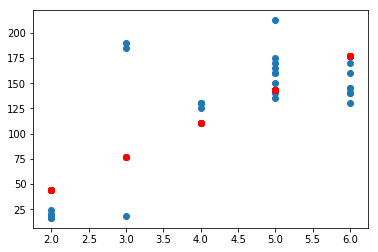

In [21]:
plt.scatter('size','avgPrice',data=newYorkTraining)
plt.scatter('size','predictedavgPrice',data=newYorkTrainingasTestingCopy,color='r')